---

**Exploratory Data Analysis**

---

- Check the number of images of each class

In [2]:
import os

main_folder_path = 'C:\\Users\\Miguel António\\Desktop\\PORTFOLIO\\image_classifier\\data\\raw\\archive (2)\\raw-img'
folder_info = {} 
found_subfolders = False

print(f"Counting files and collecting paths in subfolders of: {main_folder_path}\n")

for item in os.listdir(main_folder_path):
    item_path = os.path.join(main_folder_path, item) 
    if os.path.isdir(item_path):
        found_subfolders = True
        file_count = 0
        for _, _, files in os.walk(item_path):
            file_count += len(files)

        folder_info[item] = {
            'Full_Path': item_path,
            'Files_Count': file_count
        }
        print(f"  - Folder: '{item}'")
        print(f"    Full Path: {item_path}")
        print(f"    Files: {file_count}\n")

if not found_subfolders:
    print("No sub-folder found.")

if folder_info:
    print("Dictionary with folder information:")
    for folder_name, details in folder_info.items():
        print(f"'{folder_name}':")
        print(f"  Full Path: {details['Full_Path']}")
        print(f"  File Count: {details['Files_Count']}\n")
else:
    print("\nNo results to display or error in the specified folder.")

Counting files and collecting paths in subfolders of: C:\Users\Miguel António\Desktop\PORTFOLIO\image_classifier\data\raw\archive (2)\raw-img

  - Folder: 'cane'
    Full Path: C:\Users\Miguel António\Desktop\PORTFOLIO\image_classifier\data\raw\archive (2)\raw-img\cane
    Files: 4863

  - Folder: 'cavallo'
    Full Path: C:\Users\Miguel António\Desktop\PORTFOLIO\image_classifier\data\raw\archive (2)\raw-img\cavallo
    Files: 2623

  - Folder: 'elefante'
    Full Path: C:\Users\Miguel António\Desktop\PORTFOLIO\image_classifier\data\raw\archive (2)\raw-img\elefante
    Files: 1446

  - Folder: 'farfalla'
    Full Path: C:\Users\Miguel António\Desktop\PORTFOLIO\image_classifier\data\raw\archive (2)\raw-img\farfalla
    Files: 2112

  - Folder: 'gallina'
    Full Path: C:\Users\Miguel António\Desktop\PORTFOLIO\image_classifier\data\raw\archive (2)\raw-img\gallina
    Files: 3098

  - Folder: 'gatto'
    Full Path: C:\Users\Miguel António\Desktop\PORTFOLIO\image_classifier\data\raw\archiv

In [3]:
total_images = 0
for folder_name, details in folder_info.items():
    total_images += details['Files_Count']

print("Number of images on the dataset:", total_images)

Number of images on the dataset: 26179


- Histogram (Number of Files per Class)

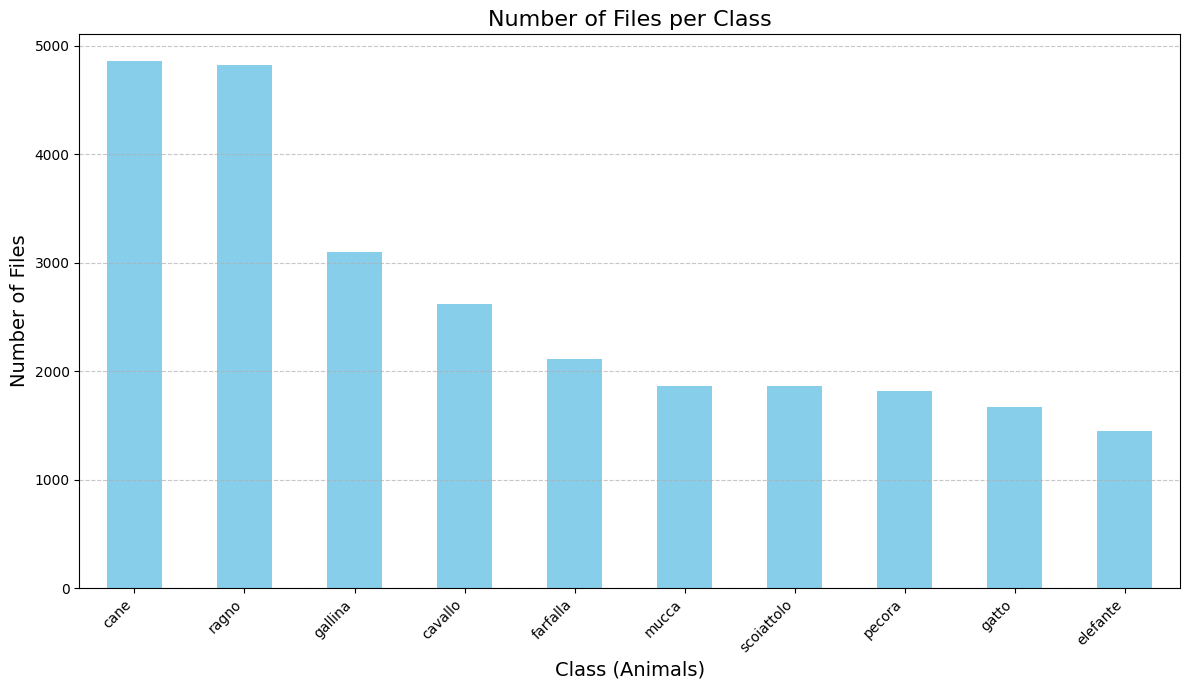

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

file_counts_for_plot = {name: details['Files_Count'] for name, details in folder_info.items()}

series = pd.Series(file_counts_for_plot)

series = series.sort_values(ascending=False)

plt.figure(figsize=(12, 7))
series.plot(kind='bar', color='skyblue')
plt.title('Number of Files per Class', fontsize=16) 
plt.xlabel('Class (Animals)', fontsize=14)
plt.ylabel('Number of Files', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.savefig('number_of_files_per_class.png')
plt.show()

- Analyse the images dimensions

Média de Largura das Imagens: 320.04 pixels
Média de Altura das Imagens: 252.63 pixels


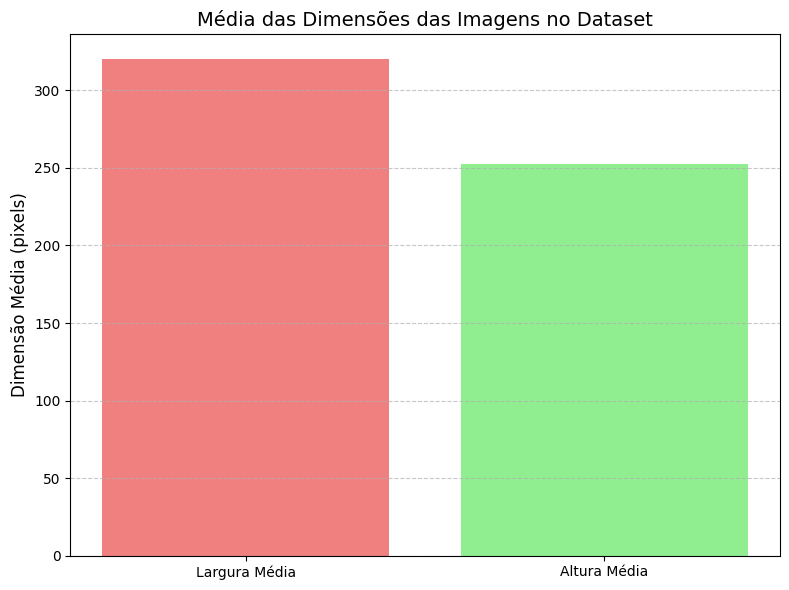

In [5]:
from PIL import Image

image_dimensions = {'width': [], 'height': []}

for folder_name, details in folder_info.items():
    folder_path = details['Full_Path'] 

    for root, _, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    width, height = img.size
                    image_dimensions['width'].append(width)
                    image_dimensions['height'].append(height)
            except Exception as e:
                print(f"Aviso: Não foi possível ler a imagem {file_path}. Erro: {e}")

# Calculate the mean of the dimensions
if image_dimensions['width'] and image_dimensions['height']:
    avg_width = sum(image_dimensions['width']) / len(image_dimensions['width'])
    avg_height = sum(image_dimensions['height']) / len(image_dimensions['height'])
    print(f"Média de Largura das Imagens: {avg_width:.2f} pixels")
    print(f"Média de Altura das Imagens: {avg_height:.2f} pixels")
else:
    print("Nenhuma imagem válida encontrada para analisar as dimensões.")
    exit() 

# Plot
labels = ['Largura Média', 'Altura Média']
values = [avg_width, avg_height]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['lightcoral', 'lightgreen'])
plt.ylabel('Dimensão Média (pixels)', fontsize=12)
plt.title('Média das Dimensões das Imagens no Dataset', fontsize=14)
plt.ylim(bottom=0) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('media_dimensoes_imagens.png')
plt.show()

Class 'cane': Average Width = 283.57, Average Height = 241.09
Class 'cavallo': Average Width = 287.95, Average Height = 233.47
Class 'elefante': Average Width = 377.62, Average Height = 274.92
Class 'farfalla': Average Width = 364.55, Average Height = 280.42
Class 'gallina': Average Width = 288.30, Average Height = 239.36
Class 'gatto': Average Width = 473.16, Average Height = 364.57
Class 'mucca': Average Width = 294.18, Average Height = 212.75
Class 'pecora': Average Width = 363.05, Average Height = 263.37
Class 'ragno': Average Width = 311.14, Average Height = 247.83
Class 'scoiattolo': Average Width = 287.84, Average Height = 224.65


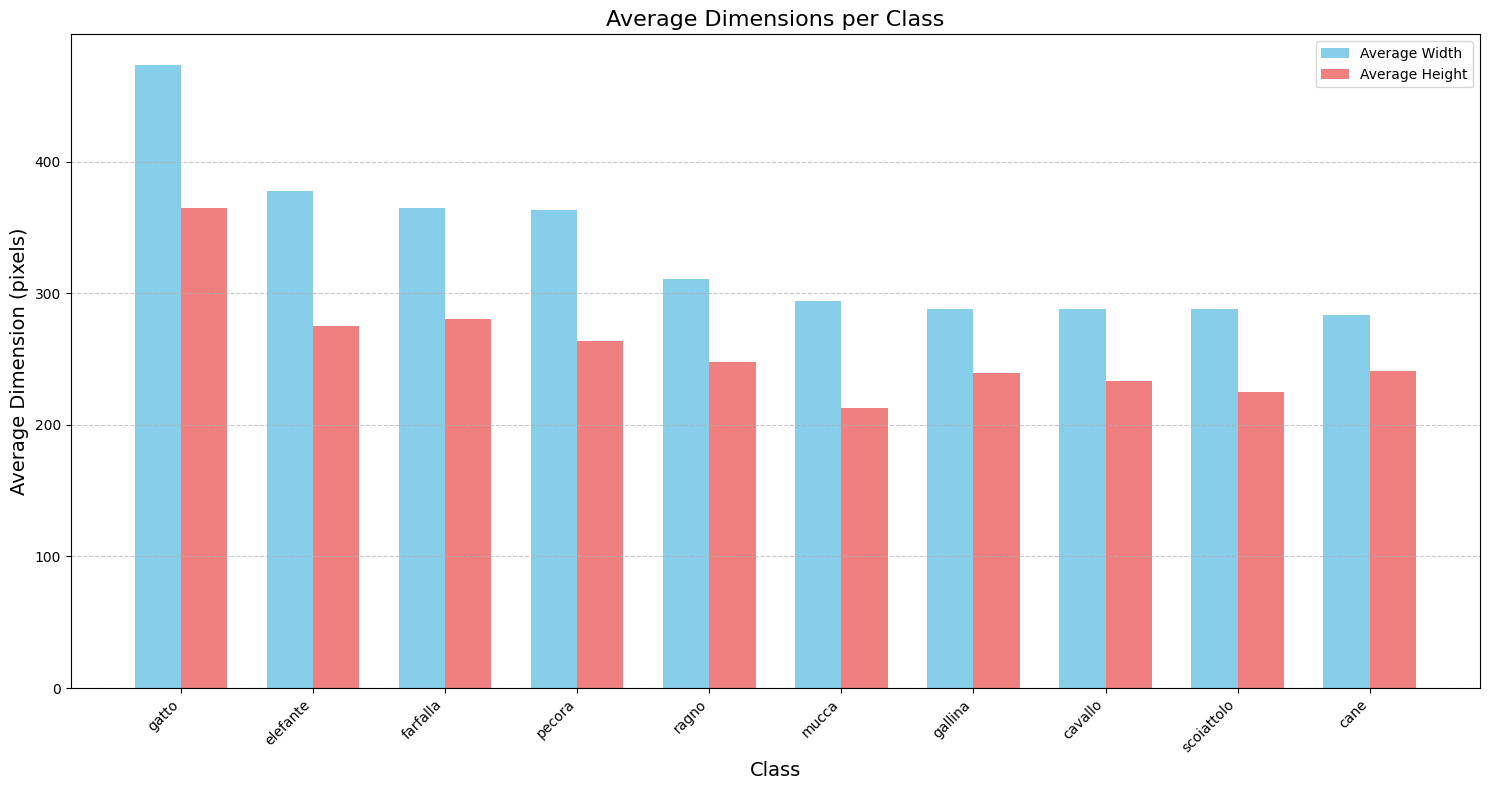

In [7]:
class_dimensions = {name: {'width': [], 'height': []} for name in folder_info.keys()}


for folder_name, details in folder_info.items():
    folder_path = details['Full_Path'] 
    
    for root, _, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    width, height = img.size
                    class_dimensions[folder_name]['width'].append(width)
                    class_dimensions[folder_name]['height'].append(height)
            except Exception as e:
                print(f"Can't read the file {file_path} for the class '{folder_name}'. Error: {e}")

# Calculate the mean for each class
average_dimensions_per_class = {}
for class_name, dims in class_dimensions.items():
    if dims['width'] and dims['height']:
        avg_w = sum(dims['width']) / len(dims['width'])
        avg_h = sum(dims['height']) / len(dims['height'])
        average_dimensions_per_class[class_name] = {'avg_width': avg_w, 'avg_height': avg_h}
        print(f"Class '{class_name}': Average Width = {avg_w:.2f}, Average Height = {avg_h:.2f}")
    else:
        print(f"Class '{class_name}': no image available.")



# Plot

class_names = []
avg_widths = []
avg_heights = []

for class_name, avg_dims in average_dimensions_per_class.items():
    class_names.append(class_name)
    avg_widths.append(avg_dims['avg_width'])
    avg_heights.append(avg_dims['avg_height'])

# Dataframe to build the plot 
df_avg_dims = pd.DataFrame({
    'Class': class_names,
    'Average Width': avg_widths,
    'Average Height': avg_heights
})

df_avg_dims = df_avg_dims.sort_values(by='Average Width', ascending=False) 

fig, ax = plt.subplots(figsize=(15, 8)) 
bar_width = 0.35
index = range(len(df_avg_dims))

bar1 = ax.bar([i - bar_width/2 for i in index], df_avg_dims['Average Width'], bar_width, label='Average Width', color='skyblue')
bar2 = ax.bar([i + bar_width/2 for i in index], df_avg_dims['Average Height'], bar_width, label='Average Height', color='lightcoral')

ax.set_xlabel('Class', fontsize=14)
ax.set_ylabel('Average Dimension (pixels)', fontsize=14)
ax.set_title('Average Dimensions per Class', fontsize=16)
ax.set_xticks(index)
ax.set_xticklabels(df_avg_dims['Class'], rotation=45, ha='right', fontsize=10)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 

plt.savefig('media_dimensoes_por_classe.png')
plt.show()
